In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_labels = pd.read_csv("/content/drive/MyDrive/DataDcience/train_labels_preprocessed.csv")
train_values = pd.read_csv("/content/drive/MyDrive/DataDcience/train_values_preprocessed.csv")

In [5]:
train_labels.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_labels.head()

,damage_grade
0,3
1,2
2,3
3,2
4,3


In [6]:
train_values.drop(labels=['Unnamed: 0'],axis=1,inplace=True)
train_values.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,...,plan_configuration_f,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,6,487,12198,2,0.500000,0.357143,0.428571,1,1,0,...,0,0,0,0,0,0,0,0,1,0
1,8,900,2812,2,0.166667,0.500000,0.714286,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,21,363,8973,2,0.166667,0.285714,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,22,418,10694,2,0.166667,0.357143,0.428571,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,11,131,1488,3,0.500000,0.500000,1.000000,1,0,0,...,0,0,0,0,0,0,0,0,1,0


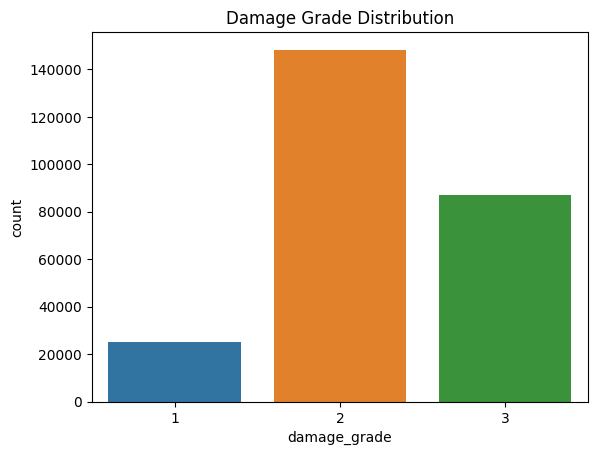

In [9]:
sns.countplot(x="damage_grade", data=train_labels)
plt.title("Damage Grade Distribution")
plt.show()

In [19]:
from imblearn.over_sampling import SMOTE
ros = SMOTE(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train_values, train_labels)

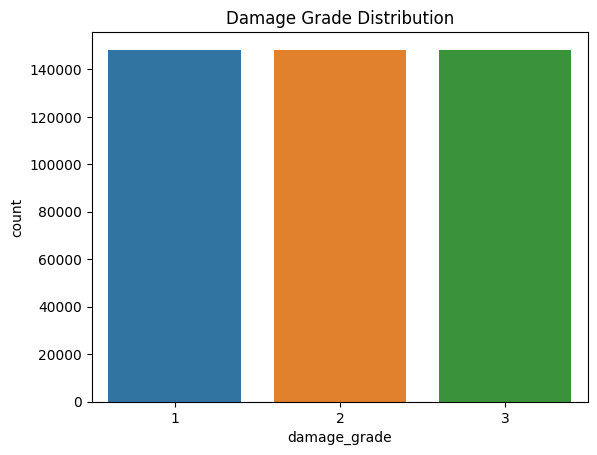

In [20]:
sns.countplot(x="damage_grade", data=y_resampled)
plt.title("Damage Grade Distribution")
plt.show()

In [21]:
X_resampled.shape

(444777, 60)

In [22]:
X_resampled.to_csv("/content/drive/MyDrive/DataDcience/train_values_oversampled.csv")
y_resampled.to_csv("/content/drive/MyDrive/DataDcience/train_labels_oversampled.csv")

In [15]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(train_values, train_labels)

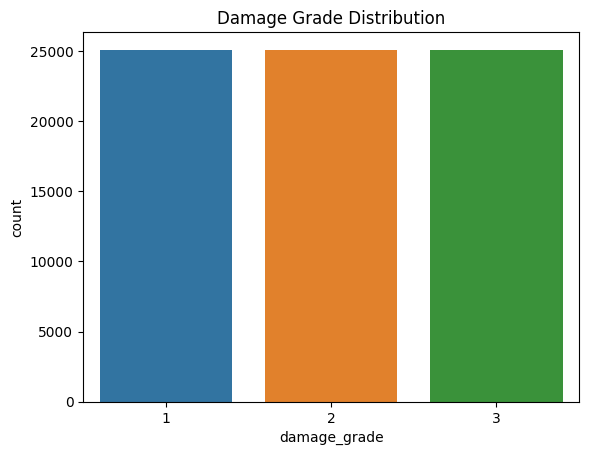

In [16]:
sns.countplot(x="damage_grade", data=y_resampled)
plt.title("Damage Grade Distribution")
plt.show()

In [17]:
X_resampled.shape

(75372, 60)

In [18]:
X_resampled.to_csv("/content/drive/MyDrive/DataDcience/train_values_undersampled.csv")
y_resampled.to_csv("/content/drive/MyDrive/DataDcience/train_labels_undersampled.csv")